In [127]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from tqdm import tqdm

In [139]:
set_str = 'set_1'
df = pd.read_csv(f'dataframes/{set_str}/data.csv')

In [140]:
i = 400
# df = df[df['label'] == 'h1']
path = df.iloc[i]['path']
print(path)
assert(os.path.exists(path))

images/set_1/IMG_1007/frame_272.jpg


In [141]:
img = cv2.imread(path)

In [142]:
img.shape

(1080, 1920, 3)

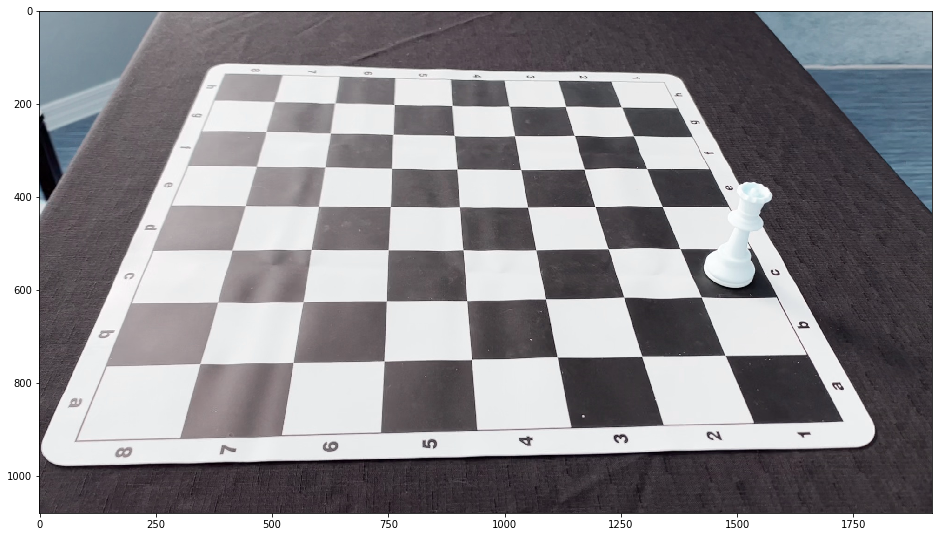

In [143]:
plt.figure(figsize=(16, 16))
plt.imshow(img)

In [144]:
new_img = cv2.resize(img, (256, 256))
# new_img = cv2.resize(img, (512, 512))

In [145]:
img.shape

(1080, 1920, 3)

In [146]:
new_img.shape

(256, 256, 3)

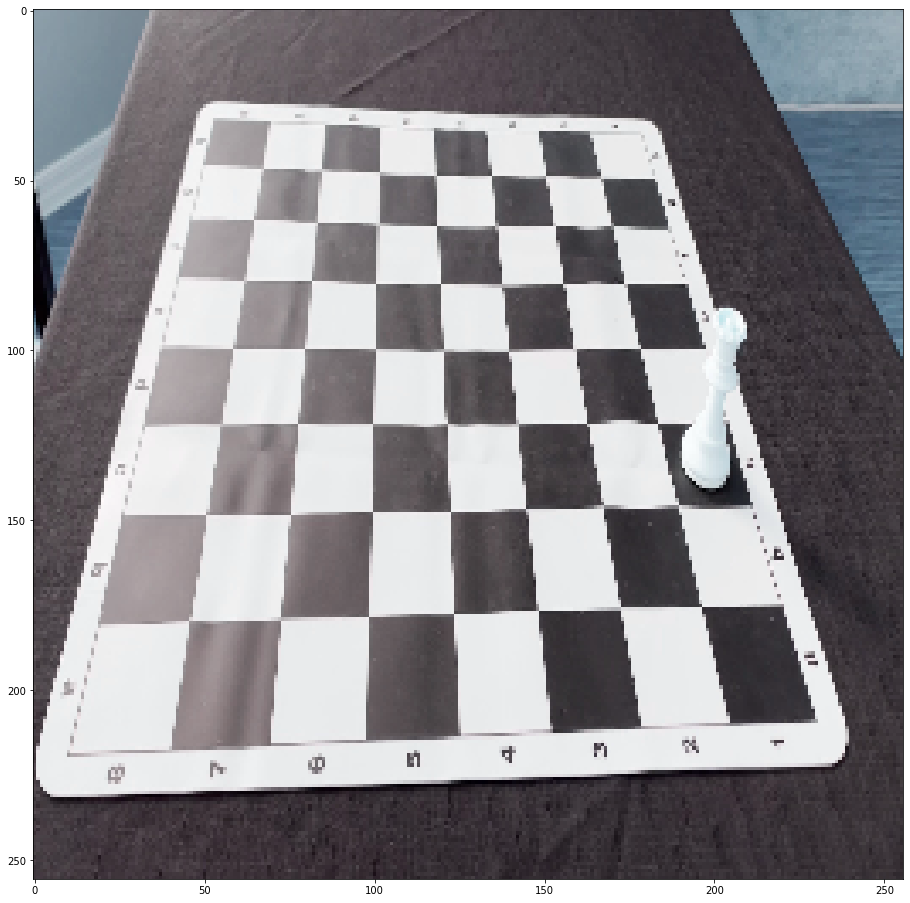

In [147]:
plt.figure(figsize=(16, 16))
plt.imshow(new_img)

In [148]:
new_data = {col: [] for col in df.columns}
new_data['original_path'] = []
print(len(df))
for i, row in tqdm(df.iterrows()):
    old_path = row['path']
    new_path = old_path.replace('images', '256x256/images')
    dir = os.path.dirname(new_path)
    if not os.path.exists(dir):
        os.makedirs(dir)
    img = cv2.imread(old_path)
    new_img = cv2.resize(img, (256, 256))
    cv2.imwrite(new_path, new_img)
    for k, v in dict(row).items():
        if k == 'path':
            new_data[k].append(new_path)
        else:
            new_data[k].append(v)
    new_data['original_path'].append(old_path)

12027


12027it [03:34, 56.19it/s] 


In [149]:
dir = f'256x256/dataframes/{set_str}'
if not os.path.exists(dir):
    os.makedirs(dir)
new_df = pd.DataFrame.from_dict(new_data)
new_df.to_csv(os.path.join(dir, 'data.csv'), index=False)